In [1]:
#pip install --upgrade tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
train = pd.read_csv('trainingset1.csv')
test = pd.read_csv('testset.csv')
train=train.iloc[:,1:12]
test=test.iloc[:,1:12]
#NumTrainCase = Xtrain.shape[0]

In [4]:
sum(train['class']=='A')

6856

In [5]:
sum(train['class']=='E')

5256

In [6]:
sum(train['class']=='F')

6276

In [7]:
trainX=train.iloc[:,0:10]
testX=test.iloc[:,0:10]
trainY=train.iloc[:,10]
testY=test.iloc[:,10]
trainY.shape

(18388,)

In [8]:
#2 Define the MLP architecture of an Automatic Classifier with r =3 classes
#- select an MLP architecture with three layers L1, H, L2, extended by a Softmax function and its final output layer OUT
#L1 => H => L2=> softmax => OUT
#p = dim(L1) = # descriptors, h = dim(H) , dim(L2) = 3 ; dim(OUT) =3

In [9]:
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
NumClass = 3
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=10,
                kernel_initializer=keras.initializers.RandomNormal(mean=0.0,stddev=0.05,seed=1)
                ,bias_initializer='zeros')) # 0?
model.add(Dense(NumClass, activation='softmax', 
                kernel_initializer=keras.initializers.RandomNormal(mean=0.0,stddev=0.05,seed=2)
                ,bias_initializer='zeros'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


In [10]:
#3. Select 2 tentative sizes h for the hidden layer

In [11]:
COR = trainX.corr()

In [12]:
eigen=np.linalg.eigvals(COR)
eigen

array([2.46597808, 1.68751494, 1.45306861, 0.07931942, 0.30884265,
       1.05956144, 0.92249925, 0.83553821, 0.61760741, 0.57007   ])

In [13]:
eigen=sorted(eigen,reverse=True)
eigen

[2.465978077647065,
 1.6875149368802134,
 1.4530686123214718,
 1.059561440157188,
 0.9224992461138684,
 0.835538208104742,
 0.6176074126456346,
 0.5700699958796014,
 0.3088426500532913,
 0.07931942019692495]

Text(0, 0.5, 'Eigenvalues (λj)')

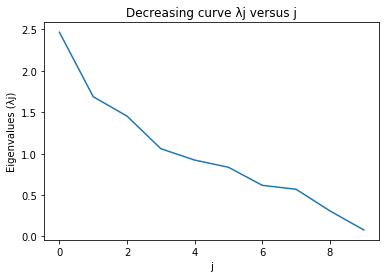

In [14]:
#Plot this decreasing sequence of eigenvalues in yr report
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(eigen)
plt.show
plt.title('Decreasing curve λj versus j')
plt.xlabel('j')
plt.ylabel('Eigenvalues (λj)')

In [15]:
#Compute the smallest number "h95" of eigenvalues preserving 95% of the total sum of eigenvalues
sum=0
Rj =[]
for i in range(10):
    sum=sum + eigen[i]
    percentage = sum/10
    Rj.append(percentage)
smallest=0
for i in range(10):
    if Rj[i] > 0.95:
        smallest = i
        break

In [16]:
smallest

7

In [17]:
Rj[smallest]

0.9611837929749782

In [18]:
#- apply PCA analysis to the set of Mj input vectors corresponding to the class Cj, with j=1,2 3 
#to generate Mj eigenvalues in decreasing order, and compute the smallest number "Uj" of
#eigenvalues preserving 95% of the total sum of these Mj eigenvalues;
A=train[train['class']=='A'].iloc[:,0:10]
E=train[train['class']=='E'].iloc[:,0:10]
F=train[train['class']=='F'].iloc[:,0:10]
A_COR = A.corr()
E_COR = E.corr()
F_COR = F.corr()
A_eigen=np.linalg.eigvals(A_COR)
E_eigen=np.linalg.eigvals(E_COR)
F_eigen=np.linalg.eigvals(F_COR)

A_eigen=sorted(A_eigen,reverse=True)
E_eigen=sorted(E_eigen,reverse=True)
F_eigen=sorted(F_eigen,reverse=True)

In [19]:
A_sum=0
A_Rj =[]
for i in range(10):
    A_sum=A_sum + A_eigen[i]
    A_percentage = A_sum/10
    A_Rj.append(A_percentage)
A_smallest=0
for i in range(10):
    if A_Rj[i] > 0.95:
        A_smallest = i
        break
A_smallest

7

In [20]:
E_sum=0
E_Rj =[]
for i in range(10):
    E_sum=E_sum + E_eigen[i]
    E_percentage = E_sum/10
    E_Rj.append(E_percentage)
E_smallest=0
for i in range(10):
    if E_Rj[i] > 0.95:
        E_smallest = i
        break
E_smallest

7

In [21]:
F_sum=0
F_Rj =[]
for i in range(10):
    F_sum=F_sum + F_eigen[i]
    F_percentage = F_sum/10
    F_Rj.append(F_percentage)
F_smallest=0
for i in range(10):
    if F_Rj[i] > 0.95:
        F_smallest = i
        break
F_smallest

7

In [22]:
h95=7
hL = 7+7+7

In [23]:
#3. for each one of the 2 values h= h95, h=hL implement automatic training
#use gradient descent to minimize avCRE= average CROSS ENTROPY error between computed and true values of the probability OUTk

In [26]:
trainX=np.array(train.iloc[:,0:10]) 
testX=np.array(test.iloc[:,0:10])
trainY=np.array(pd.get_dummies(train.iloc[:,10]),dtype='float')
testY=np.array(pd.get_dummies(test.iloc[:,10]),dtype='float')
trainY.shape

(18388, 3)

In [27]:
trainX=tf.convert_to_tensor(trainX, dtype=tf.float32)
trainY=tf.convert_to_tensor(trainY, dtype=tf.float32)
testX=tf.convert_to_tensor(testX, dtype=tf.float32)
testY=tf.convert_to_tensor(testY, dtype=tf.float32)

In [28]:
from tensorflow.keras import optimizers, losses

# Configure your own learning rate schedule and mini-batch size.

MiniBatchSize = 128
NumTrainCase = len(trainX)
decay_steps = 144
loss_fn = losses.CategoricalCrossentropy()
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1, decay_steps=decay_steps, decay_rate=np.exp(-0.04), staircase=False)
sgd = optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer=sgd, loss=loss_fn,metrics=['accuracy'])

In [29]:
from tensorflow.keras import callbacks

# For recording gradients and training loss over the whole training set
# at the end of each epoch 
# and each batch, but you should change the epoch in model.fit to 10 or lower and active the green comment below
# this implement is expensive, so do it after you finish parameter tuning and get the best model 

class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.real_loss_tr = []
        self.real_loss_te = []
        self.accuracy_tr = []
        self.accuracy_te = []
        #self.batch_weight = []
        #self.batch_loss = []
        self.lr = []
    def on_epoch_end(self, epoch, logs={}): 
        Ypred = self.model.predict(trainX)
        Ypred_test = self.model.predict(testX)
        loss_value_tr = loss_fn(trainY,Ypred)
        loss_value_te = loss_fn(testY,Ypred_test)
        correct_answer_tr = np.argmax(Ypred,axis=1) == np.argmax(trainY,axis=1)
        correct_answer_te = np.argmax(Ypred_test,axis=1) == np.argmax(testY,axis=1)
        accuracy_tr = correct_answer_tr.sum()/len(correct_answer_tr)
        accuracy_te = correct_answer_te.sum()/len(correct_answer_te)
        
        self.real_loss_tr.append(loss_value_tr.numpy())
        self.real_loss_te.append(loss_value_te.numpy())
        self.accuracy_tr.append(accuracy_tr)
        self.accuracy_te.append(accuracy_te)

    #def on_batch_end(self,batch,logs={}):
        #batch_weight = self.model.get_weights()
        #batch_loss= self.model.evaluate(trainX,trainY)
        #lr = self.model.optimizer._decayed_lr('float32').numpy()
        #self.batch_weight.append(batch_weight)
        #self.batch_loss.append(batch_loss)
        #self.lr.append(lr)


GradsReal_loss = MyHistory()

In [30]:
# For saving the best model choosen by keras.
filepath = 'BestModel.h5'
checkpointer = callbacks.ModelCheckpoint(
    filepath=filepath,monitor='val_loss', save_best_only=True, mode='auto', save_freq='epoch')

In [31]:
# Train the model and store validation loss history in 'Monitor'.
# !! Be carefual that in Keras, the "loss" of each epoch (stored in     !!
# !! 'Monitor.history['loss']') is calculated as the average of the losses   !!
# !! of mini-batches in that epoch. So it is not the real epoch loss over !!
# !! the whole training set. Use 'GradsReal_loss.real_loss' instead.       !!
# But it is safe to use 'Monitor.history['val_loss']' for validation losses.

Monitor = model.fit(trainX, trainY, epochs=100, batch_size=MiniBatchSize,
                    callbacks=[checkpointer],validation_data=(testX, testY)) 

Train on 18388 samples, validate on 2938 samples
Epoch 1/100
18388/18388 [==============================] - 2s 100us/sample - loss: 1.0258 - accuracy: 0.5129 - val_loss: 0.9213 - val_accuracy: 0.6065
Epoch 2/100
18388/18388 [==============================] - 0s 26us/sample - loss: 0.8874 - accuracy: 0.6162 - val_loss: 0.8270 - val_accuracy: 0.6327
Epoch 3/100
18388/18388 [==============================] - 0s 23us/sample - loss: 0.8140 - accuracy: 0.6474 - val_loss: 0.7887 - val_accuracy: 0.6477
Epoch 4/100
18388/18388 [==============================] - 0s 22us/sample - loss: 0.7774 - accuracy: 0.6614 - val_loss: 0.7965 - val_accuracy: 0.6317
Epoch 5/100
18388/18388 [==============================] - 0s 23us/sample - loss: 0.7504 - accuracy: 0.6678 - val_loss: 0.7641 - val_accuracy: 0.6569
Epoch 6/100
18388/18388 [==============================] - 0s 26us/sample - loss: 0.7278 - accuracy: 0.6749 - val_loss: 0.7465 - val_accuracy: 0.6668
Epoch 7/100
18388/18388 [=========================

Epoch 55/100
18388/18388 [==============================] - 0s 24us/sample - loss: 0.5154 - accuracy: 0.7742 - val_loss: 0.5765 - val_accuracy: 0.7410
Epoch 56/100
18388/18388 [==============================] - 0s 23us/sample - loss: 0.5146 - accuracy: 0.7743 - val_loss: 0.5765 - val_accuracy: 0.7420
Epoch 57/100
18388/18388 [==============================] - 1s 27us/sample - loss: 0.5138 - accuracy: 0.7748 - val_loss: 0.5709 - val_accuracy: 0.7447
Epoch 58/100
18388/18388 [==============================] - 1s 37us/sample - loss: 0.5131 - accuracy: 0.7748 - val_loss: 0.5792 - val_accuracy: 0.7406
Epoch 59/100
18388/18388 [==============================] - 1s 34us/sample - loss: 0.5125 - accuracy: 0.7766 - val_loss: 0.5741 - val_accuracy: 0.7420
Epoch 60/100
18388/18388 [==============================] - 1s 27us/sample - loss: 0.5118 - accuracy: 0.7764 - val_loss: 0.5691 - val_accuracy: 0.7451
Epoch 61/100
18388/18388 [==============================] - 0s 25us/sample - loss: 0.5113 - ac

In [34]:
from tensorflow.keras.models import load_model

# Restore the best model and calculate confusion matrices.

bestmodel = load_model('BestModel.h5')
YtrainPred = bestmodel.predict(trainX)
YtestPred = bestmodel.predict(testX)
print(tf.math.confusion_matrix(np.argmax(trainY, axis=1), np.argmax(YtrainPred, axis=1),
                  num_classes=NumClass).numpy())
print(tf.math.confusion_matrix(np.argmax(testY, axis=1), np.argmax(YtestPred, axis=1),
                  num_classes=NumClass).numpy())

[[4981  319 1556]
 [ 255 4737  264]
 [1450  210 4616]]
[[1222   92  401]
 [  30  382   26]
 [ 167   30  588]]


In [35]:
# loss value and accuracy of trainin set and test set with best model
loss_tr = bestmodel.evaluate(trainX,trainY)
loss_te = bestmodel.evaluate(testX,testY)
loss_tr,loss_te

2938/2938 [==============================] - 0s 79us/sample - loss: 0.5617 - accuracy: 0.7461


([0.5003233364490884, 0.7795301], [0.5617021558802496, 0.74608576])

In [36]:
Monitor.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(*args, **kw)>

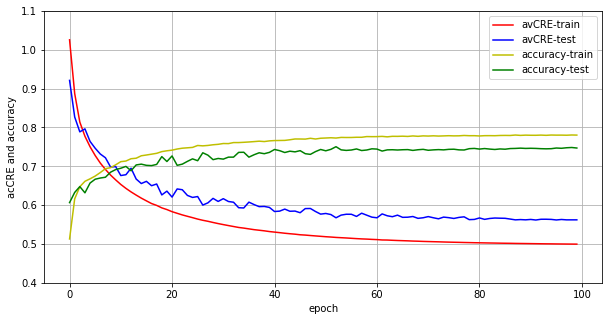

In [59]:
loss_tr = Monitor.history['loss']
acc_tr = Monitor.history['accuracy']
loss_te = Monitor.history['val_loss']
acc_te = Monitor.history['val_accuracy']

nEpoch=100

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(nEpoch),loss_tr,c='r')
ax.plot(range(nEpoch),loss_te,c='b')
ax.plot(range(nEpoch),acc_tr,c='y')
ax.plot(range(nEpoch),acc_te,c='g')
ax.set_xlabel('epoch')
ax.set_ylabel('acCRE and accuracy')
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
plt.legend(['avCRE-train','avCRE-test','accuracy-train','accuracy-test'],loc='best')
plt.show

In [60]:
# h= (7,21,50,100,200) compare the performance 
loss_tr_7 = Monitor.history['loss']
acc_tr_7 = Monitor.history['accuracy']
loss_te_7 = Monitor.history['val_loss']
acc_te_7 = Monitor.history['val_accuracy']

In [61]:
loss_tr_21 = Monitor.history['loss']
acc_tr_21 = Monitor.history['accuracy']
loss_te_21 = Monitor.history['val_loss']
acc_te_21 = Monitor.history['val_accuracy']

In [62]:
loss_tr_50 = Monitor.history['loss']
acc_tr_50 = Monitor.history['accuracy']
loss_te_50 = Monitor.history['val_loss']
acc_te_50 = Monitor.history['val_accuracy']

In [63]:
loss_tr_100 = Monitor.history['loss']
acc_tr_100 = Monitor.history['accuracy']
loss_te_100 = Monitor.history['val_loss']
acc_te_100 = Monitor.history['val_accuracy']

In [64]:
loss_tr_150 = Monitor.history['loss']
acc_tr_150 = Monitor.history['accuracy']
loss_te_150 = Monitor.history['val_loss']
acc_te_150 = Monitor.history['val_accuracy']

<function matplotlib.pyplot.show(*args, **kw)>

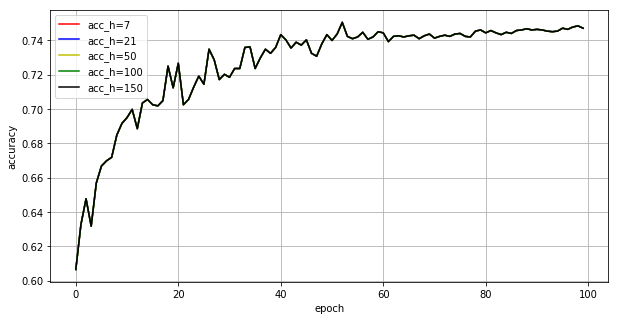

In [65]:
# plot loss value and acc of test set when h = 7 , 21, 50,100,200

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(nEpoch),acc_te_7,c='r')
ax.plot(range(nEpoch),acc_te_21,c='b')
ax.plot(range(nEpoch),acc_te_50,c='y')
ax.plot(range(nEpoch),acc_te_100,c='g')
ax.plot(range(nEpoch),acc_te_150,c='k')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.legend(['acc_h=7','acc_h=21','acc_h=50','acc_h=100','acc_h=150'],loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

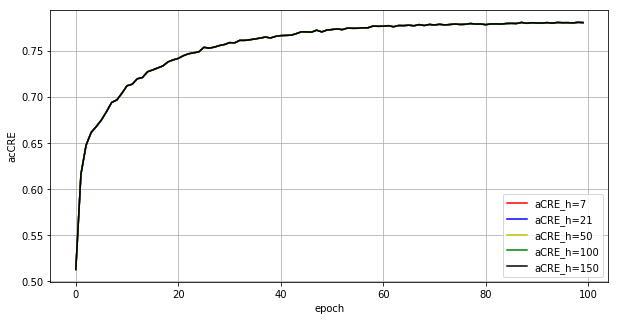

In [66]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(nEpoch),acc_tr_7,c='r')
ax.plot(range(nEpoch),acc_tr_21,c='b')
ax.plot(range(nEpoch),acc_tr_50,c='y')
ax.plot(range(nEpoch),acc_tr_100,c='g')
ax.plot(range(nEpoch),acc_tr_150,c='k')
ax.set_xlabel('epoch')
ax.set_ylabel('acCRE')
plt.legend(['aCRE_h=7','aCRE_h=21','aCRE_h=50','aCRE_h=100','aCRE_h=150'],loc='best')
plt.show

In [68]:
# hidden layer activity analysis by PCA 
from numpy import linalg as la
Hidd_state = model.layers[0](trainX).numpy()

corrMatrix = np.corrcoef(Hidd_state,rowvar=False)
eigen=la.eig(corrMatrix)
eigenValues=eigen[0]
eigenValues=np.sort(eigenValues)[::-1]
RAT=[]
eigen_sum=0
for i in range(len(eigenValues)):
    eigen_sum=eigen_sum+eigenValues[i]
    ratio=eigen_sum/sum(eigenValues)
    RAT.append(ratio)

j=0
for i in range(10):
    if RAT[i]>=0.95:
        j=i
        break
j


TypeError: 'numpy.float64' object is not callable

In [69]:
# plot batch CRE vs n = epoch * batch per epoch ( 1 epoch * batches per epoch) 


loss_batch=np.array(GradsReal_loss.batch_loss)[:,0]
acc_batch=np.array(GradsReal_loss.batch_loss)[:,1]

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
axb=fig.add_subplot(1,1,1)
axb.grid()
axb.plot(range(len(loss_batch)),loss_batch,c='b')
axb.plot(range(len(loss_batch)),acc_batch,c='y')
axb.set_xlabel('batches')
axb.set_ylabel('aveCRE_batch and accuracy')
plt.legend(['aveCRE','accuracy'],loc='best')
#ax2.set_xticks(range(0,721,72))
plt.show

AttributeError: 'MyHistory' object has no attribute 'batch_loss'

In [70]:
# plot ||W(n+1)- W(n)|| / ||Wn|| vs n batch 
from numpy import linalg as la
weight_batch=GradsReal_loss.batch_weight

dim_input = 10
dim_hidd = 21
dim_output = 3

W_change=[]
W = []
w_nplus1=np.empty((297,))
for i in range(len(loss_batch)):
  w_n = w_nplus1
  w1 = weight_batch[i][0].reshape((1,dim_input*dim_hidd))[0]
  b1 = weight_batch[i][1]
  w2 = weight_batch[i][2].reshape((1,dim_hidd*dim_output))[0]
  b2 = weight_batch[i][3]
  w_nplus1 = np.concatenate((w1,b1,w2,b2),axis=0)
  w_change = la.norm(w_nplus1-w_n)/la.norm(w_n)
  W_change.append(w_change)
  W.append(w_nplus1)

len(W_change)

fig=plt.figure(figsize=(10,5))
axw=fig.add_subplot(1,1,1)
axw.grid()
axw.plot(range(len(loss_batch)),W_change ,c='b')

axw.set_xlabel('batches')
axw.set_ylabel('||W(n+1)- W(n)|| / ||Wn||')
plt.show

AttributeError: 'MyHistory' object has no attribute 'batch_weight'

In [ ]:
# plot learning rate (epsilon)
lr=GradsReal_loss.lr

fig=plt.figure(figsize=(10,5))
axE=fig.add_subplot(1,1,1)
axE.grid()
axE.plot(range(len(lr)),lr ,c='b')
axE.set_xlabel('batchs')
axE.set_ylabel('learning rate')
#ax4.set_xticks(range(0,21600,72))
plt.show

In [ ]:
# compute ||Gn|| = ( 1/ ε(n) ) || W(n+1)- W(n)|| and plot ||Gn||/d 

d = 297  # when h = 21
learning_rate = 0.01
Grad = []

for i in range (len(loss_batch)-1):
  grad = (la.norm(W[i+1]-W[i]))/(learning_rate*d)
  Grad.append(grad)

fig=plt.figure(figsize=(10,5))
ax5=fig.add_subplot(1,1,1)
ax5.grid()
ax5.plot(range(len(loss_batch)-1),Grad ,c='b')
ax5.set_xlabel('batches')
ax5.set_ylabel('||Gn||/d ')
#ax5.set_xticks(range(0,921,92))
plt.show
 

In [ ]:
# plot grad vs batches
# compute the learning rate(epsilon)
# you can change the initial value of decay steps
#import numpy as np
#ini_lr = 0.01
#lr = []
#decay_steps = 144
#epoch =300
#decay_rate=0.96
#batchs = 144
#for epoch in range(epoch):
#  eps=ini_lr * decay_rate ** (epoch/decay_steps)
#  for step in range(batchs):
#    lr.append(eps)

Problem 6-2

In [43]:
Houtput = model.layers[0](trainX).numpy()

In [44]:
df = pd.DataFrame(Houtput)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,2.680668,0.000000,0.691153,0.268455,0.000000,3.483537,0.201745,3.608440,0.000000,...,0.000000,1.768708,0.000000,0.000000,0.000000,2.647604,1.224956,0.000000,0.219683,0.000000
1,0.197285,0.020243,0.087694,0.000000,0.000000,0.446848,0.000000,0.000000,0.000000,0.521682,...,0.141117,0.000000,0.619725,0.403054,0.075420,0.000000,0.000000,0.601765,0.000000,0.000000
2,0.000000,0.000000,0.222966,0.261989,1.392420,0.000000,0.000000,0.165965,0.000000,3.450629,...,1.103695,0.000000,4.926399,0.000000,1.798532,0.473729,0.000000,0.000000,0.380162,0.000000
3,0.000000,1.497763,0.000000,0.000000,0.000000,0.000000,0.000000,0.347845,0.000000,0.022494,...,0.000000,0.532333,0.191488,0.000000,0.334112,1.340052,0.000000,0.000000,0.000000,0.000000
4,0.293628,0.000000,0.253873,0.245448,0.163039,0.409875,0.622564,0.015918,0.000000,0.326400,...,0.101176,0.000000,0.391801,0.359524,0.309012,0.000000,0.000000,0.419526,0.105025,0.088351
5,0.417236,0.137996,0.000000,0.000000,0.237810,0.414119,0.000000,0.000000,0.000000,0.714325,...,0.178926,0.000000,0.711122,0.008173,0.000000,0.000000,0.000000,0.466305,0.050176,0.000000
6,0.366734,0.000000,0.152466,0.000000,0.017724,1.112423,0.222870,0.000000,0.000000,0.570270,...,0.101708,0.000000,0.657813,0.668590,0.057324,0.000000,0.000000,0.717095,0.117655,0.000000
7,0.147115,0.026894,0.090729,0.000000,0.000000,0.098386,0.000000,0.000000,0.000000,0.573607,...,0.211056,0.000000,0.706401,0.317392,0.142690,0.000000,0.000000,0.573169,0.038229,0.000000
8,0.000000,0.164822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210426,...,0.000000,0.000000,0.296382,0.000000,0.298724,0.000000,0.000000,0.759367,0.000000,0.000000
9,0.000000,1.311323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122614,...,0.728444,0.000000,0.079508,0.000000,0.048016,0.169254,0.057234,1.540964,0.000000,0.822355


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,9.850925,-2.431494,0.688281
1,-0.946096,0.353093,0.069987
2,2.724860,12.873277,4.520409
3,3.053233,2.437915,-2.721763
4,-1.010990,-0.358817,0.541953
5,-0.964690,0.567209,0.440930
6,-1.098319,0.148692,0.462430
7,-0.786282,0.691481,0.061088
8,-0.812540,-0.259460,-0.444992
9,0.367193,2.407231,-4.737342


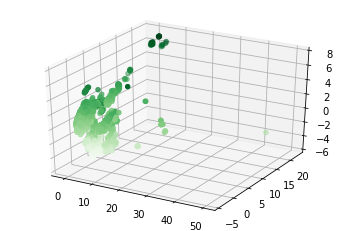

In [46]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(principalDf.iloc[:,0],principalDf.iloc[:,1],principalDf.iloc[:,2], c=principalDf.iloc[:,2], cmap='Greens')

Problem 6-3

In [47]:
df_trainx = pd.DataFrame(trainX.numpy())
df_trainy = pd.DataFrame(np.argmax(trainY, axis=1))
CL1 = pd.DataFrame()
CL2 = pd.DataFrame()
CL3 = pd.DataFrame()
for i in range(18388):
    if df_trainy.iloc[i,0] == 0:
        CL1 = CL1.append(pd.DataFrame(df_trainx.iloc[i,:]).T)
    elif df_trainy.iloc[i,0] == 1:
        CL2 = CL2.append(pd.DataFrame(df_trainx.iloc[i,:]).T)
    else:
        CL3 = CL3.append(pd.DataFrame(df_trainx.iloc[i,:]).T)

In [48]:
CL1=np.random.permutation(CL1)
CL2=np.random.permutation(CL2)
CL3=np.random.permutation(CL3)
CL1=tf.convert_to_tensor(CL1, dtype=tf.float32)
CL2=tf.convert_to_tensor(CL2, dtype=tf.float32)
CL3=tf.convert_to_tensor(CL3, dtype=tf.float32)

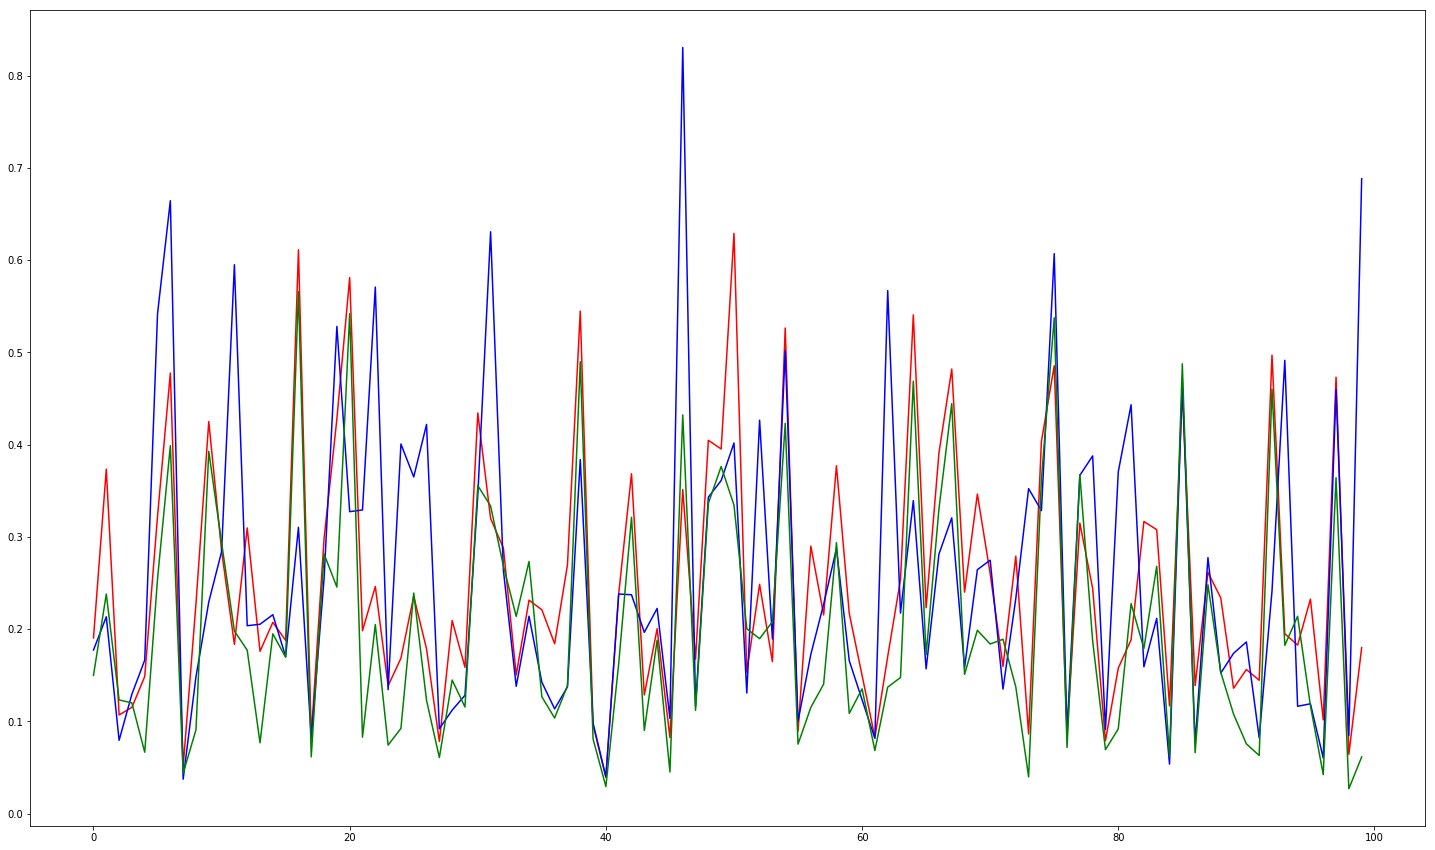

In [49]:
Houtput_1 = model.layers[0](CL1).numpy()
Houtput_2 = model.layers[0](CL2).numpy()
Houtput_3 = model.layers[0](CL3).numpy()
fig, ax = plt.subplots(figsize=(25,15))
plt.plot(pd.DataFrame(Houtput_1).mean(),color="red")
plt.plot(pd.DataFrame(Houtput_2).mean(),color="blue")
plt.plot(pd.DataFrame(Houtput_3).mean(),color="green")

Problem 6-4

In [50]:
for i in range(100):
    if abs(pd.DataFrame(Houtput_1).mean()[i] - pd.DataFrame(Houtput_2).mean()[i])> 0.5:
        print(i)

99


In [51]:
for i in range(100):
    if abs(pd.DataFrame(Houtput_1).mean()[i] - pd.DataFrame(Houtput_3).mean()[i])> 0.2:
        print(i)

50


In [52]:
for i in range(100):
    if abs(pd.DataFrame(Houtput_2).mean()[i] - pd.DataFrame(Houtput_3).mean()[i])> 0.6:
        print(i)

99


the 100th hidden neuron achieve best DIFFERENTIATION between class C1 versus C2

the 51th hidden neuron achieve best DIFFERENTIATION between class C1 versus C3

the 100th hidden neuron achieve best DIFFERENTIATION between class C2 versus C3